# Ejercicio de tarea de componentes principales

## Galicia Pineda Enrique

Escribe de manera concisa y clara tus respuestas, justificando los pasos
necesarios. Las conclusiones deben escribirse en el contexto del problema.

1. En este ejercicio emplearemos los datos del archivo `DATOS CP.csv`. Los datos consisten en las reacciones observadas en 98 pacientes que fueron sometidos a un tratamiento de radioterapia.
Las variables medidas son:

  1) Número de síntomas, tales como garganta adolorida o náuseas;
  
  2) grado de actividad realizada, en una escala de 1 a 5;
  
  3) cantidad de sueño, en una escala de 1 a 5;
  
  4) cantidad de comida consumida, en una escala de 1 a 3;
  
  5) apetito, en una escala de 1 a 5;
  
  6) reacciones sobre la piel, en una escala de 0 a 3.
  
Responde lo siguiente:

   a) Obtener las matrices de covarianza y correlaciones, $S$ y $R$, para estos datos.

  b) Elegir una de las matrices $S$ o $R$ (justificando la elección), y determinar los valores y vectores propios. Construir una tabla que muestre en orden decreciente de tamaño, el porcentaje de cada valor propio que contribuye a explicar la varianza muestral total.

  c) Con los resultados obtenidos en b), decidir el número de componentes principales importantes. ¿Es posible resumir los datos con un solo componente como indicador de las reacciones?. Justifica tu respuesta.
  
  d) Construir una tabla de los coeficientes de correlación entre cada componente principal que se decidió retener y las variables originales. ¿Es posible interpretar los componentes?

El análisis de componentes principales es una técnica de reducción de dimensionalidad que transforma un conjunto de variables correlacionadas en un número menor de componentes no correlacionadas, llamadas componentes principales. Estas componentes capturan la mayor parte de la varianza de los datos, facilitando su interpretación y visualización. En este ejercicio, aplicaremos el ACP a un conjunto de datos que mide seis variables relacionadas con las reacciones de 98 pacientes sometidos a radioterapia, con el objetivo de identificar patrones subyacentes y simplificar el análisis.  

La elección entre utilizar la matriz de covarianza o la de correlación  dependerá de las unidades y escalas de las variables que analizaremos en este notebook.

Un aspecto clave del PCA es la relación entre las componentes principales y las variables originales, la cual se expresa a través de los loadings o cargas factoriales. Estas cargas indican la contribución de cada variable original a cada componente principal, facilitando la interpretación de las nuevas dimensiones. Además, el porcentaje de varianza explicada por cada componente permite evaluar su importancia relativa y decidir cuántas componentes retener para un análisis posterior.

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = (pd.read_csv("DATOS_CP.csv")
          .rename(columns = {"REAC. SOBRE  PIEL" : "REAC_SOBRE_PIEL"}))

La matriz de covarianza ($S$) y la matriz de correlaciones ($R$) para un conjunto de datos de $n$ registros y $p$ variables se definen como:

$$
\mathbf{S} = \left[s_{ij}\right],\dots~i,j=1,\dots,p,  
$$

Donde $s_{ij}$ es la covarianza entre las variables $i$-ésima y $j$-ésima que podemos escribir como:

$$
\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2,
$$

Por otro lado, la matriz de correlaciones se puede obtener como

$$
R = \left[r_{ij}\right]
$$

Donde $r_{ij}$ es la correlación entre las variables $i$-ésima y $j$-ésima que podemos escribir como:

$$
r_{ij}=\frac{s_{ij}}{\sqrt{s_{ii}s_{jj}}}
$$

Donde $s_{ij}$ también es la covarianza entre las variables $i$-ésima y $j$-ésima y cuando $i=j$ entonces representa la varianza de la variable $i$-ésima.


En Python, usando `Pandas`, $S$ se calcula con `data.cov()` y $R$ con `data.corr()`, donde `data` es un `DataFrame` con las variables en columnas. Estas matrices permiten evaluar dependencias lineales y escalar los datos para análisis posteriores.

In [3]:
data_cov = data.cov()
data_cov

,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL
SINTOMAS,4.654751,0.931345,0.589699,0.276915,1.074886,0.158151
ACTIVIDAD,0.931345,0.612821,0.110933,0.118469,0.388886,-0.024852
SUENO,0.589699,0.110933,0.571429,0.087005,0.347990,0.110131
COMIDA,0.276915,0.118469,0.087005,0.110409,0.217406,0.021814
APETITO,1.074886,0.388886,0.347990,0.217406,0.862172,-0.008818
REAC_SOBRE_PIEL,0.158151,-0.024852,0.110131,0.021814,-0.008818,0.861456


In [4]:
data_cor = data.corr()
data_cor

,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL
SINTOMAS,1.000000,0.551437,0.361577,0.386275,0.536558,0.078978
ACTIVIDAD,0.551437,1.000000,0.187463,0.455445,0.535006,-0.034204
SUENO,0.361577,0.187463,1.000000,0.346386,0.495779,0.156969
COMIDA,0.386275,0.455445,0.346386,1.000000,0.704647,0.070733
APETITO,0.536558,0.535006,0.495779,0.704647,1.000000,-0.010232
REAC_SOBRE_PIEL,0.078978,-0.034204,0.156969,0.070733,-0.010232,1.000000


En el Análisis de Componentes Principales (ACP), la decisión de escalar los datos puede alterar significativamente los resultados e interpretaciones.

Dado que no es deseable que los componentes principales obtenidos dependan de una elección arbitraria de escalado, se sigue una práctica común: estandarizar cada variable para que tenga una desviación estándar igual a uno (escala unitaria) antes de aplicar el ACP. Este procedimiento asegura que todas las variables contribuyan por igual al análisis, evitando que aquellas con magnitudes mayores dominen artificialmente las componentes. [1]

Sin embargo, existen casos donde las variables comparten unidades de medida idénticas. En estos contextos, prescindir del escalado puede ser válido e incluso preferible. Por ejemplo, en estudios genómicos, cuando las variables representan niveles de expresión de p genes medidos en las mismas unidades (como lecturas de RNA-seq), mantener la escala original permite preservar las diferencias biológicas reales en la variabilidad de expresión. En tales escenarios, podría justificarse omitir la estandarización, ya que las unidades son inherentemente comparables y el escalado artificial podría enmascarar patrones biológicamente relevantes. [1]

En el caso de la tarea sí estamos tratando con variables que tienen diferentes escalas y para las cuales las varianzas terminan siendo afectadas, para prueba basta con notar la diagonal de la matriz de covarianzas, donde las varianzas de cada variable tienen diferentes valores y algunos muy dispares. Esto también lo podemos notar en un resumen de estadística descriptiva rápido utilizando `data.describe()`:

In [5]:
data.describe()

,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,3.542347,1.809357,2.137602,2.209000,2.574827,1.275510
std,2.157487,0.782829,0.755929,0.332279,0.928532,0.928146
min,0.000000,0.941000,0.666000,1.286000,1.000000,0.000000
25%,1.887000,1.111000,1.564250,2.000000,1.924000,1.000000
50%,3.404000,1.641000,2.177500,2.139500,2.500000,1.000000
75%,5.178250,2.323250,2.712000,2.440250,3.272000,2.000000
max,10.461000,4.000000,4.000000,2.937000,5.000000,3.000000


Por estas razones, utilizaremos la matriz de correlaciones $R$ en lugar de la matriz de covarianzas $S$. No obstante, recordemos que primero debemos estandarizar los datos si es que vamos a trabajar con la matriz de correlaciones y los datos tienen diferentes escalas. Esto lo podemos lograr con `sklearn.preprocessing.StandardScaler`:

In [6]:
data_std = StandardScaler().fit_transform(data)
data_std = pd.DataFrame(data=data_std, columns=data.columns)
data_std

,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL
0,-1.236155,-0.539733,-0.774672,0.039325,-0.681791,-0.298365
1,-0.339792,-0.478101,-1.513973,0.311575,-0.284511,0.784590
2,-0.972930,-0.922361,0.301036,0.744149,0.361745,1.867546
3,-1.513357,-1.114958,-1.434192,-0.632224,-1.704758,-0.298365
4,-0.379858,0.944555,0.906039,1.566948,1.641266,-1.381321
...,...,...,...,...,...,...
93,0.259802,0.116384,0.880775,-0.632224,0.027250,0.784590
94,-1.592091,-0.959596,-0.931574,-1.010349,-1.095308,-1.381321
95,1.252604,1.232168,-0.898332,0.532399,1.542758,0.784590
96,-0.252671,-0.454990,-0.063295,0.193600,0.754694,0.784590


In [7]:
data_cor = data_std.corr()
data_cor

,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL
SINTOMAS,1.000000,0.551437,0.361577,0.386275,0.536558,0.078978
ACTIVIDAD,0.551437,1.000000,0.187463,0.455445,0.535006,-0.034204
SUENO,0.361577,0.187463,1.000000,0.346386,0.495779,0.156969
COMIDA,0.386275,0.455445,0.346386,1.000000,0.704647,0.070733
APETITO,0.536558,0.535006,0.495779,0.704647,1.000000,-0.010232
REAC_SOBRE_PIEL,0.078978,-0.034204,0.156969,0.070733,-0.010232,1.000000


Y esta será la matriz sobre la que trabajaremos.

Un aspecto importante a notar es que cuando estandarizamos la matriz, calcular la correlación de los datos estandarizados se reduce a calcular la covarianza de los datos estandarizados, pues:

$$
R = \left[r_{ij}\right]
$$

Donde $r_{ij}$ es la correlación entre las variables $i$-ésima y $j$-ésima que podemos escribir como:

$$
r_{ij}=\frac{s_{ij}}{\sqrt{s_{ii}s_{jj}}}
$$

Pero como los datos están estandarizados, $s_{ii}=1$ y $s_{jj}$=1 por lo que

$$
r_{ij}=s_{ij}
$$

Y entonces entrada por entrada $R$ contiene la covarianza de los datos estandarizados.

Esto lo podemos comprobar numéricamente si calculamos la covarianza de nuestra matriz estandarizada:

In [8]:
data_std.cov()

,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL
SINTOMAS,1.010309,0.557122,0.365305,0.390257,0.542090,0.079792
ACTIVIDAD,0.557122,1.010309,0.189395,0.460140,0.540522,-0.034557
SUENO,0.365305,0.189395,1.010309,0.349957,0.500891,0.158587
COMIDA,0.390257,0.460140,0.349957,1.010309,0.711911,0.071463
APETITO,0.542090,0.540522,0.500891,0.711911,1.010309,-0.010337
REAC_SOBRE_PIEL,0.079792,-0.034557,0.158587,0.071463,-0.010337,1.010309


Y como podemos observar los datos efectivamente coinciden.

Para calcular los autovalores y autovectores de la matriz de correlaciones, utilizaremos el módulo de `scipy.linalg.eigh` y los ordenaremos de acuerdo a los autovalores:

In [9]:
cor_eigenvalues, cor_eigenvectors = sp.linalg.eigh(data_cor)

# sorting
idx = cor_eigenvalues.argsort()[::-1]
cor_eigenvalues = cor_eigenvalues[idx]
cor_eigenvectors = cor_eigenvectors[:, idx]

Para poder calcular el porcentaje de varianza explicada y cómo se relacionan los principales componentes con las variables originales construiremos la matriz de cargas a partir de los autovectores (`cor_eigenvectors`) y autovalores (`cor_eigenvalues`) obtenidos. Las cargas representan la contribución de cada variable original a cada componente principal (PC), mientras que los autovalores cuantifican su importancia (varianza explicada). Calcularemos el porcentaje de varianza explicada y su acumulado, que serán útiles para determinar cuántas PC retener. La matriz resultante se transpone (`loadings.T`) para facilitar la visualización, mostrando las PCs como filas y las variables como columnas.

Las cargas cercanas a ±1 indican una fuerte correlación entre la variable y la PC.

El porcentaje de varianza explicada se calcula normalizando los autovalores.

In [10]:
cargas_var = pd.DataFrame(
    cor_eigenvectors,
    index=data.columns,  # Original variables as rows
    columns=[f'PC{i+1}' for i in range(len(data.columns))]  # Principal components as columns
)

# Add variance explained information
cargas_var.loc['AUTOVALORES'] = cor_eigenvalues
cargas_var.loc['PORCENTAJE_VARIANZA_EXPLICADA'] = cor_eigenvalues / cor_eigenvalues.sum() * 100

# Add cumulative variance
cargas_var.loc['PORCENTAJE_VARIANZA_ACUMULADA'] = np.cumsum(cargas_var.loc['PORCENTAJE_VARIANZA_EXPLICADA'])

# Display the loading matrix
print("Matriz de cargas y contribuciones de las variables")
display(cargas_var.T)

Matriz de cargas y contribuciones de las variables


,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL,AUTOVALORES,PORCENTAJE_VARIANZA_EXPLICADA,PORCENTAJE_VARIANZA_ACUMULADA
PC1,-0.444858,-0.429300,-0.358773,-0.462854,-0.521276,-0.055877,2.864308,47.738463,47.738463
PC2,-0.026660,-0.291738,0.380135,-0.020959,-0.073690,0.873960,1.076450,17.940827,65.679290
PC3,-0.339330,-0.498607,0.628157,0.124585,0.203339,-0.429880,0.777641,12.960686,78.639976
PC4,0.551149,0.061367,0.421060,-0.665604,-0.200526,-0.178715,0.650314,10.838571,89.478547
PC5,0.600851,-0.687297,-0.331839,0.207413,0.103175,-0.053090,0.388032,6.467196,95.945743
PC6,-0.146492,-0.076408,-0.211635,-0.532689,0.794127,0.116262,0.243255,4.054257,100.000000


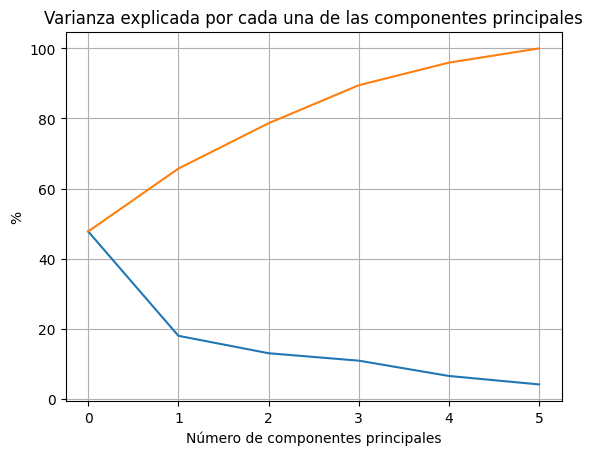

In [11]:
explained_variance = cor_eigenvalues / np.sum(cor_eigenvalues) * 100
cumulative_explained = np.cumsum(explained_variance)
plt.title("Varianza explicada por cada una de las componentes principales")
plt.plot(explained_variance, label="Porcentaje de varianza explicada")
plt.plot(cumulative_explained, label="Porcentaje de varianza acumulada")
plt.grid()
plt.xlabel("Número de componentes principales")
plt.ylabel("%")
plt.show()

No es recomendable resumir los datos con un **solo componente principal (PC1)** como indicador único de las reacciones. Si bien PC1 explica el **47.7%** de la varianza total (la mayor contribución individual), este porcentaje es insuficiente para capturar la variabilidad clave del conjunto de datos.

Como regla, un buen componente o indicador debería capturar la mayor información posible de los datos. PC1 solo alcanza el **47.7%**, que si bien es alto deja fuera más de la mitad de la información relevante en el dataset.

Otra forma de verlo es que PC1 está dominado por variables como **APETITO** (`-0.521`), **COMIDA** (`-0.463`), y **SINTOMAS** (`-0.445`), pero ignora casi por completo **REAC_SOBRE_PIEL** (`-0.056`), cuya mayor contribución está en **PC2** (`0.874`). Sugiriendo que PC1 no refleja adecuadamente todas las dimensiones del fenómeno analizado.  

Si utilizamos **3 componentes (PC1, PC2, PC3)** apenas podemos superar el **75%** de varianza explicada (78.6%), y con **4 componentes** llegamos al **89.5%**. Esto refuerza que un único componente es demasiado simplista.  


Debemos usar **múltiples componentes** para construir un indicador más robusto, buscando un equilibrio entre simplificación y representatividad. La variable **REAC_SOBRE_PIEL**, en particular, requiere PC2 para ser interpretada correctamente. Por estas razones, yo escogería utilizar **3 PC**, es decir, **PC1, PC2 y PC33** para análisis, pues permiten realizar gráficas, capturan una gran parte de la varianza explicada y cada una captura diferentes aspectos de las variables originales.

Finalmente, para calcular las correlaciones entre las variables principales y las variables originales, recordemos que la correlación entre las variables $A$, $B$ se define como:

$$
r:=\frac{\text{cov}(A,B)}{\sqrt{\text{var}(A)\text{var}(B)}}
$$

En particular si $A=X_{i}$ es la variable original $i$-ésima y $B=Z_{j}$ es la Componente Principal $j$-ésima entonces:

$$
\begin{align*}
\text{cov}(X_{i}Z_{j})&=\text{cov}\left(\sum\limits_{h=1}^{p}a_{ih}Z_h,Zj\right)\\
&=a_{ij}\text{var}(Z_{j})\\
&=a_{ij}\lambda_{j}\\
\end{align*}
$$

Por lo que:

$$
\begin{align*}
r_{ij}&=\frac{a_{ij}\lambda_{j}}{\sqrt{\text{var}(X_{i})\lambda{j}}}\\
&=a_{ij}\frac{\lambda_j}{s_{ii}}
\end{align*}
$$

Pero como estandarizamos nuestras variables, $s_{ii}=1$ para todas las _variables originales_ y $r_{ij}=a_{ij}\sqrt{\lambda_{j}}$

Primero calcularemos las raices cuadradas de nuestros autovalores:

In [12]:
sqrt_lambda = np.sqrt(cargas_var.iloc[6])
sqrt_lambda

,AUTOVALORES
PC1,1.692427
PC2,1.037521
PC3,0.881840
PC4,0.806421
PC5,0.622922
PC6,0.493209


In [13]:
cargas_var.iloc[:6,].T

,SINTOMAS,ACTIVIDAD,SUENO,COMIDA,APETITO,REAC_SOBRE_PIEL
PC1,-0.444858,-0.429300,-0.358773,-0.462854,-0.521276,-0.055877
PC2,-0.026660,-0.291738,0.380135,-0.020959,-0.073690,0.873960
PC3,-0.339330,-0.498607,0.628157,0.124585,0.203339,-0.429880
PC4,0.551149,0.061367,0.421060,-0.665604,-0.200526,-0.178715
PC5,0.600851,-0.687297,-0.331839,0.207413,0.103175,-0.053090
PC6,-0.146492,-0.076408,-0.211635,-0.532689,0.794127,0.116262


Posteriormente multiplicaremos esas raíces por las cargas de cada uno de los componentes para saber la correlación con la respectiva variable original

In [14]:
print(cargas_var.iloc[:6,].T.apply(lambda x: np.asarray(x) * np.asarray(sqrt_lambda)).to_markdown())

|     |   SINTOMAS |   ACTIVIDAD |     SUENO |     COMIDA |    APETITO |   REAC_SOBRE_PIEL |
|:----|-----------:|------------:|----------:|-----------:|-----------:|------------------:|
| PC1 | -0.75289   |  -0.726558  | -0.607197 | -0.783346  | -0.882222  |        -0.094568  |
| PC2 | -0.0276599 |  -0.302684  |  0.394398 | -0.0217452 | -0.076455  |         0.906752  |
| PC3 | -0.299234  |  -0.439692  |  0.553934 |  0.109864  |  0.179312  |        -0.379086  |
| PC4 |  0.444458  |   0.0494878 |  0.339551 | -0.536756  | -0.161709  |        -0.14412   |
| PC5 |  0.374283  |  -0.428133  | -0.20671  |  0.129202  |  0.0642701 |        -0.0330709 |
| PC6 | -0.072251  |  -0.0376854 | -0.10438  | -0.262727  |  0.391671  |         0.0573413 |


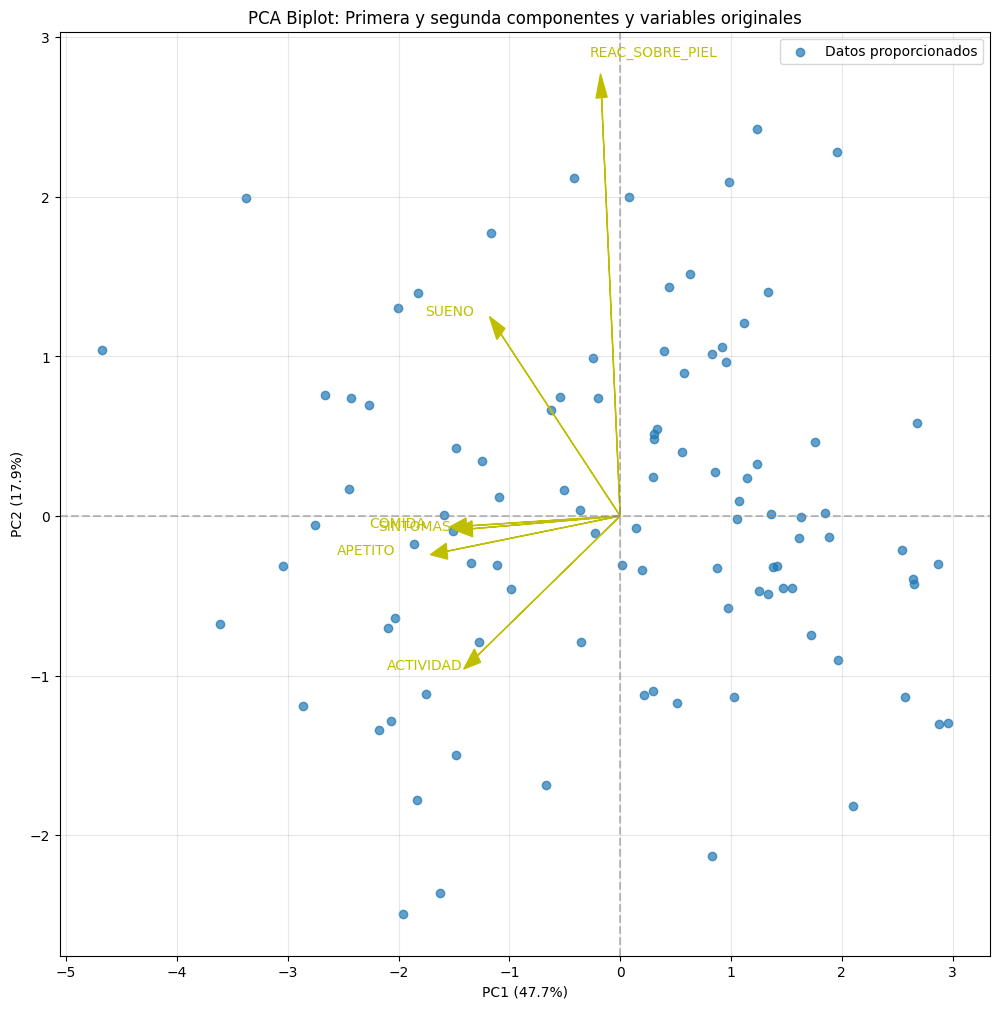

In [15]:
# Project data onto principal components
scores = StandardScaler().fit_transform(data).dot(cor_eigenvectors)
loadings = cor_eigenvectors

plt.figure(figsize=(12, 12))

# 1. Plot projected data points (scores)
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.7, label='Datos proporcionados')

# 2. Plot variable vectors (loadings)
scale=3
variables = data.columns
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i, 0]*scale, loadings[i, 1]*scale,
              color='y', head_width=0.1)
    plt.text(loadings[i, 0]*(scale+1.9), loadings[i, 1]*(scale+0.3), var, color='y')

# Formatting
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel(f'PC1 ({cor_eigenvalues[0]/sum(cor_eigenvalues)*100:.1f}%)')
plt.ylabel(f'PC2 ({cor_eigenvalues[1]/sum(cor_eigenvalues)*100:.1f}%)')
plt.title('PCA Biplot: Primera y segunda componentes y variables originales')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

De la tabla y la gráfica anterior podemos concluir que: **PC1** (eje horizontal) captura el **patrón principal** de variabilidad, con fuertes correlaciones negativas en: **APETITO** (-0.88), **COMIDA** (-0.78), **SINTOMAS** (-0.75) y **ACTIVIDAD** (-0.73).  

Esto sugiere que PC1 representa una dimensión subyacente relacionada con **síntomas físicos y hábitos básicos** (apetito, alimentación, actividad), donde valores altos en PC1 indicarían **menor severidad** en estos aspectos (por el signo negativo).  

Por otro lado, **REAC_SOBRE_PIEL se asocia exclusivamente a PC2**  pues en **PC2** (eje vertical) está dominado por **REAC_SOBRE_PIEL** (0.91), con contribuciones mínimas de otras variables.  

Esto revela que la variable **REAC_SOBRE_PIEL** es casi **independientes** del patrón capturado por PC1 y constituyen una dimensión separada del fenómeno estudiado.  

Además el biplot muestra cómo existen variables cercanas entre sí: APETITO, COMIDA y SINTOMAS agrupadas en la dirección negativa de PC1, confirmando su correlación.  

Por otro lado SUENO y ACTIVIDAD están en posiciones intermedias, sugiriendo que podrían compartir influencia de ambas componentes.

[1] James G., Witten D., Hastie T., Tibshirani R. *An Introduction to Statistical Learning with Applications in R*. 2da Edición. Springer Texts in Statistics